In [2]:
import open3d as o3d
import numpy as np
from pcd_helper import *
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
scene = "08"
file = "000000"

# Path to the Velodyne .bin file and .label file
bin_file_path = f'data/sequences/{scene}/velodyne/{file}.bin'
label_file = f"data/sequences/{scene}/labels/{file}.label"
label_output_path = f"out/predicted_labels/{scene}/{file}.npy"

In [4]:
# Load data

# Read the point cloud data
points = read_velodyne_bin(bin_file_path)

# Extract x, y, z coordinates (first three columns)
xyz = points[:, :3]

# Load labels
true_labels = load_labels(label_file)
true_colors = label2color(true_labels)

# Predicted labels
predicted_grid_labels = np.load(label_output_path)
predicted_colors = grid_label2color(xyz, predicted_grid_labels)

In [12]:
# Visualize true labels

# Create Open3D PointCloud object
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyz)
pcd.colors = o3d.utility.Vector3dVector(true_colors)


# # Add intensity as colors
# intensity = points[:, 3]
# intensity_colors = np.zeros((points.shape[0], 3))
# intensity_colors[:, 0] = intensity  # Using intensity as red color channel for visualization

# pcd.colors = o3d.utility.Vector3dVector(intensity_colors)

# Visualize the point cloud
o3d.visualization.draw_geometries([pcd], window_name="Velodyne Point Cloud", width=800, height=600)

In [43]:
from sklearn.cluster import DBSCAN
from time import time
# Visualize DBscan

target = 40  # "road"
#target = 10  # "car"
mask = true_labels == target

xyz_tmp = xyz[mask]


# Create Open3D PointCloud object
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyz_tmp)

start = time()
clustering = DBSCAN(eps=2, min_samples=15).fit(xyz_tmp)
#labels = np.array(pcd.cluster_dbscan(eps=2, min_points=15))

end = time()

print(end-start)

# max_label = labels.max()
# print(f"point cloud has {max_label + 1} clusters")
# colors = plt.get_cmap("tab20")(labels / (max_label if max_label > 0 else 1))
# colors[labels < 0] = 0
# pcd.colors = o3d.utility.Vector3dVector(colors[:, :3])


# # Visualize the point cloud
# o3d.visualization.draw_geometries([pcd], window_name="DBScan Point Cloud", width=800, height=600)

0.7772607803344727


In [41]:
print(end-start)

1.7208774089813232


In [20]:
# Visualize K-means

target = 40  # "road"
mask = true_labels == target

xyz_tmp = xyz[mask]

# Create Open3D PointCloud object
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyz_tmp)

labels = []
score = np.inf

scores = []
for i in range(3,4):
    kmeans = KMeans(n_clusters=i).fit(xyz_tmp)
    scores.append(kmeans.inertia_)


scores = np.array(scores)
diff = abs(np.diff(scores))

labels = kmeans.labels_

max_label = labels.max()
print(f"point cloud has {max_label + 1} clusters")
colors = plt.get_cmap("tab20")(labels / (max_label if max_label > 0 else 1))
colors[labels < 0] = 0
pcd.colors = o3d.utility.Vector3dVector(colors[:, :3])


# Visualize the point cloud
o3d.visualization.draw_geometries([pcd], window_name="K-means Point Cloud", width=800, height=600)

point cloud has 3 clusters


In [19]:
print(scores)
print(abs(diff))

[3097613.25   1299727.75    773450.3125  576381.6875  433595.25
  359054.8125  303015.3125  260165.      222314.5   ]
[1797885.5     526277.4375  197068.625   142786.4375   74540.4375
   56039.5      42850.3125   37850.5   ]


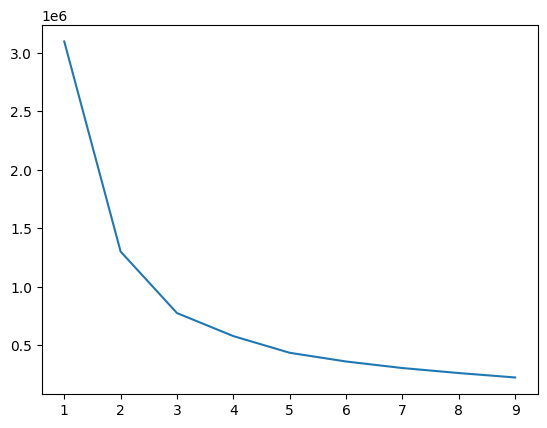

In [18]:
plt.plot(range(1,10),scores)

In [28]:
xyz.shape

(123389, 3)

In [24]:
xyz_tmp.shape

(20975, 3)

In [23]:
kmeans.labels_.shape

(20975,)

In [6]:
# Visualize predicted labels

# Create Open3D PointCloud object
pcd_pred = o3d.geometry.PointCloud()
pcd_pred.points = o3d.utility.Vector3dVector(xyz)
pcd_pred.colors = o3d.utility.Vector3dVector(predicted_colors)

# Visualize the point cloud
o3d.visualization.draw_geometries([pcd_pred], window_name="Velodyne Point Cloud", width=800, height=600)